In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131323 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [1]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
import os
os.chdir('drive/IOP - Time Series')

In [14]:
import os
print(os.getcwd())
!ls

/content/drive/IOP - Time Series
ARIMA_10_daily.ipynb   drive		       Wind_Data_10_hourly.csv
ARIMA_10_hourly.ipynb  Wind_Data_10_daily.csv


In [0]:
from pandas import read_csv
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [16]:
series = read_csv('Wind_Data_10_daily.csv',
header=0, sep=";", squeeze=True, parse_dates=True)
series

,Year,Month,Day,Hour,Minute,Wind Speed daily mean,Wind Direction daily mean,Wind Speed daily max,Wind Speed daily min
0,2001,1,1,0,0,7.96,140.21,9.80,5.71
1,2001,1,2,0,0,9.29,144.55,20.59,5.18
2,2001,1,3,0,0,20.63,209.30,32.88,7.23
3,2001,1,4,0,0,15.79,190.95,27.13,7.27
4,2001,1,5,0,0,10.03,166.59,14.02,7.85
5,2001,1,6,0,0,9.30,230.02,15.67,2.01
6,2001,1,7,0,0,3.44,202.25,6.35,0.23
7,2001,1,8,0,0,4.29,238.09,8.51,0.35
8,2001,1,9,0,0,7.29,174.06,9.19,3.40
9,2001,1,10,0,0,7.81,155.13,11.11,5.11


In [17]:
series = series[0:500]
series

,Year,Month,Day,Hour,Minute,Wind Speed daily mean,Wind Direction daily mean,Wind Speed daily max,Wind Speed daily min
0,2001,1,1,0,0,7.96,140.21,9.80,5.71
1,2001,1,2,0,0,9.29,144.55,20.59,5.18
2,2001,1,3,0,0,20.63,209.30,32.88,7.23
3,2001,1,4,0,0,15.79,190.95,27.13,7.27
4,2001,1,5,0,0,10.03,166.59,14.02,7.85
5,2001,1,6,0,0,9.30,230.02,15.67,2.01
6,2001,1,7,0,0,3.44,202.25,6.35,0.23
7,2001,1,8,0,0,4.29,238.09,8.51,0.35
8,2001,1,9,0,0,7.29,174.06,9.19,3.40
9,2001,1,10,0,0,7.81,155.13,11.11,5.11


In [18]:
series = series.drop('Wind Direction daily mean', 1)
series = series.drop('Wind Speed daily max', 1)
series = series.drop('Wind Speed daily min', 1)
series = series.drop('Minute', 1)
series = series.drop('Year', 1)
series = series.drop('Month', 1)
series = series.drop('Day', 1)
series = series.drop('Hour', 1)


series

,Wind Speed daily mean
0,7.96
1,9.29
2,20.63
3,15.79
4,10.03
5,9.30
6,3.44
7,4.29
8,7.29
9,7.81


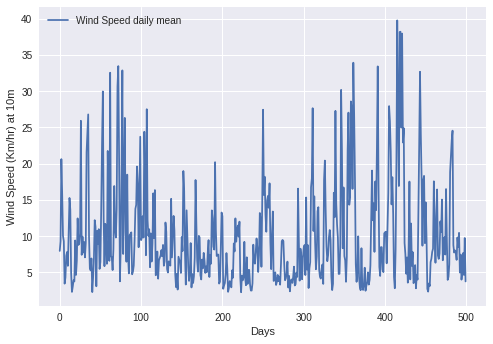

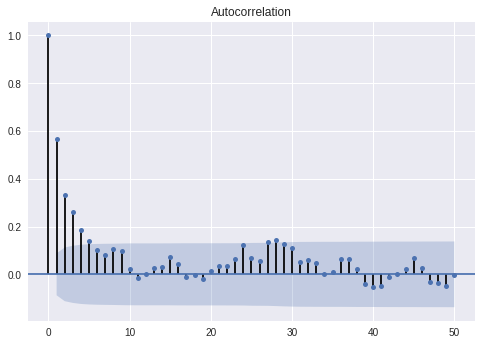

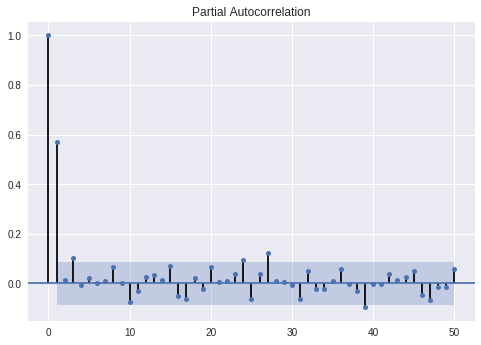

In [19]:
# Wind Speed Plot
series.plot()
plt.xlabel('Days')
plt.ylabel('Wind Speed (Km/hr) at 10m')
plt.show()


# ACF Plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags = 50)
#autocorrelation_plot(series)
plt.show()

# PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, lags = 50)
plt.show()

                                ARIMA Model Results                                
Dep. Variable:     D.Wind Speed daily mean   No. Observations:                  499
Model:                      ARIMA(3, 1, 1)   Log Likelihood               -1585.975
Method:                            css-mle   S.D. of innovations              5.781
Date:                     Mon, 25 Mar 2019   AIC                           3183.950
Time:                             18:13:07   BIC                           3209.225
Sample:                                  1   HQIC                          3193.869
                                                                                   
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0025      0.005      0.544      0.587      -0.007       0.012
ar.L1.D.Wind Speed daily mean     

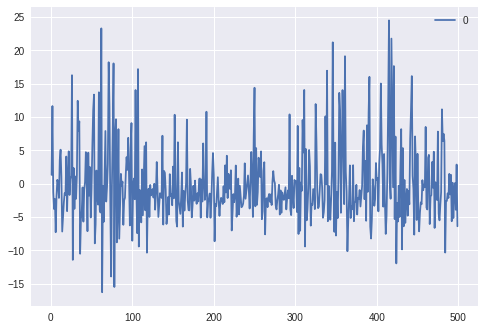

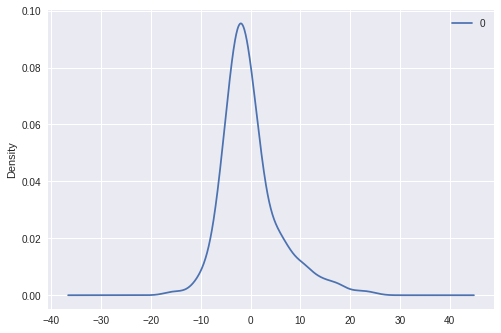

                0
count  499.000000
mean    -0.090862
std      5.814302
min    -16.253559
25%     -3.543577
50%     -1.262388
75%      1.902456
max     24.470778


In [20]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(series, order=(3,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Example=0.000000, predicted=10.244463, expected=10.530000
Example=1.000000, predicted=9.899630, expected=10.610000
Example=2.000000, predicted=10.544099, expected=6.250000
Example=3.000000, predicted=8.276933, expected=10.890000
Example=4.000000, predicted=10.948499, expected=15.950000
Example=5.000000, predicted=12.717053, expected=27.950000
Example=6.000000, predicted=19.206146, expected=25.850000
Example=7.000000, predicted=18.020111, expected=21.680000
Example=8.000000, predicted=17.475192, expected=14.380000
Example=9.000000, predicted=13.699425, expected=18.140000
Example=10.000000, predicted=15.941680, expected=13.040000
Example=11.000000, predicted=12.277965, expected=4.380000
Example=12.000000, predicted=8.509687, expected=2.810000
Example=13.000000, predicted=7.626575, expected=8.210000
Example=14.000000, predicted=9.660612, expected=20.500000
Example=15.000000, predicted=15.747634, expected=39.780000
Example=16.000000, predicted=26.337964, expected=26.480000
Example=17.00000

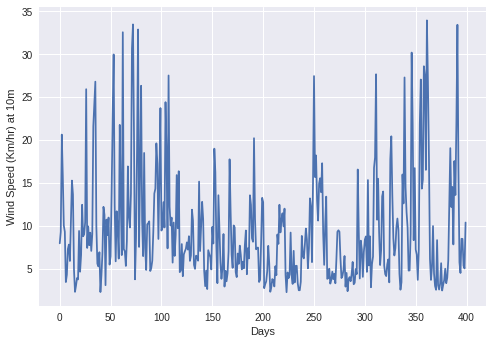

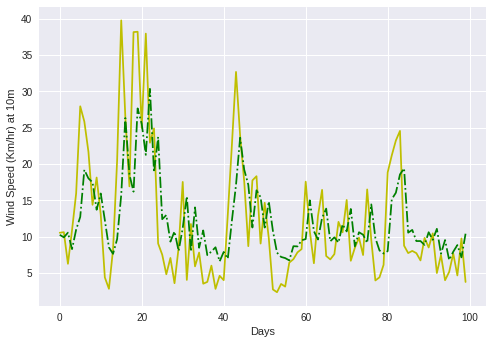

In [21]:

# Model-1 (LOOP-TRAINING)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X = series.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(4,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('Example=%f, predicted=%f, expected=%f' % (t, yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

error = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % error)

# plot
plt.plot(train)
plt.xlabel('Days')
plt.ylabel('Wind Speed (Km/hr) at 10m')
plt.show()
plt.plot(test, 'y')
plt.plot(predictions, 'g-.')
plt.xlabel('Days')
plt.ylabel('Wind Speed (Km/hr) at 10m')
plt.show()

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=2516.745, BIC=2540.694, Fit time=0.605 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=2632.546, BIC=2640.529, Fit time=0.046 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=2518.560, BIC=2530.535, Fit time=0.113 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=2533.162, BIC=2545.136, Fit time=0.113 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=2514.852, BIC=2534.809, Fit time=0.360 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=2520.542, BIC=2536.507, Fit time=0.160 seconds
Fit ARIMA: order=(1, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=2516.765, BIC=2540.714, Fit time=0.408 seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=2518.240, BIC=2546.180, Fit time=0.700 seconds
Fit ARIMA: order=(0, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=2527.689, BIC=2543.655, Fit time=0.158 seconds
Total fit time: 2.675 seconds


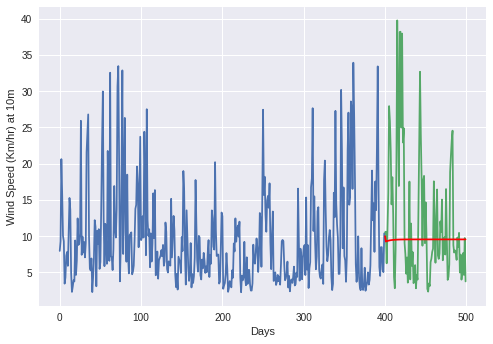

Test MSE: 83.289
Test MAE: 6.339


In [22]:
# Model-2 (Auto ARIMA)

X = series.values

#divide into train and test set
train1 = series[:int(0.80*(len(X)))]
test1 = series[int(0.80*(len(X))):]

#plotting the data

train1['Wind Speed daily mean'].plot()
test1['Wind Speed daily mean'].plot()


# Auto ARIMA Model

from pyramid.arima import auto_arima
model = auto_arima(train1, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train1)

forecast = model.predict(n_periods=len(test1))
forecast = pd.DataFrame(forecast,index = test1.index,columns=['Prediction'])

# plot the predictions for Test set
plt.plot(forecast, label='Prediction', color = 'red')
plt.xlabel('Days')
plt.ylabel('Wind Speed (Km/hr) at 10m')
plt.show()


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

error = mean_squared_error(test1, forecast)
print('Test MSE: %.3f' % error)

error = mean_absolute_error(test1, forecast)
print('Test MAE: %.3f' % error)


In [0]:


from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
model = ARIMA(train, order=(5,2,2))
model_fit = model.fit(disp=0)

    
output = model_fit.forecast(steps=len(test))
yhat = output[0]
#predictions.append(yhat)
    
for t in range(len(test)):
    #history.append(obs)
    obs = test[t]
    print('Example=%f, predicted=%f, expected=%f' % (t, yhat[t], obs))
error = mean_squared_error(test, yhat)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(yhat, color='yellow')
plt.show()


3.8109123427622382
